In [52]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

In [53]:
df = pd.read_csv('R01_combined_posnegNoBaC.csv')

In [54]:
df = df[df['Sodium_Adduct'] == 0]
df = df[df['Potasium_Adduct'] == 0]
df = df[df['Ammonium_Adduct'] == 0]
df = df[df['ACN_Adduct'] == 0]
df = df[df['Formate_Adduct'] == 0]
df = df[df['H2O_Adduct'] == 0]
df = df[df['CO2_Adduct'] == 0]
df = df[df['pos_neg_dup'] == 0]

In [55]:
#df = df.loc[df['BH_sig_mvc'] == 1]
#df = df.loc[df['Met_Presence'] == 1]

In [56]:
df = df.set_index('chem_id_s1')
df = df.loc[:, 'M331':'845C']
dfM = df.filter(regex='M')
dfC = df.filter(regex='C')

In [57]:
df1 = df

In [58]:
df1

,M331,M332,M317,M524,M102,M341,M330,M345,M340,M507,...,845M,255C,253C,264C,838C,849C,839C,842C,846C,845C
chem_id_s1,,,,,,,,,,,,,,,,,,,,,
158.0848_1.8326_75,65215.000000,103812.500000,2.023423e+06,31643.000000,931150.500000,344605.500000,5.072588e+06,309443.500000,736124.500000,243287.500000,...,83547.000000,9342.465502,7489.329245,6029.267201,10114.370328,16012.235566,5930.418134,666671.000000,5285.357501,8147.563029
148.0886_3.6386_30,65970.500000,147700.000000,1.463695e+05,68400.000000,315608.000000,183750.500000,7.315850e+04,34625.500000,174071.000000,297238.500000,...,2919.456204,6005.066864,8045.212283,2065.579316,6564.186383,11166.472479,9238.377170,2067.519698,2402.784528,2964.496889
196.0739_11.7317_477,4760.965329,4709.224498,4.708510e+03,5507.477701,1509.994756,10406.346072,4.407831e+03,4294.941530,4237.978025,4811.550656,...,8440.438889,8884.887679,5855.669992,4404.619892,8310.859550,3895.920785,5716.938756,8216.707378,6227.314121,5091.556011
147.1045_3.2268_364,7257.881127,7047.362348,6.221647e+03,5502.825889,1021.730020,7893.434044,6.366524e+03,8443.258052,1637.863535,2030.802783,...,13501.696923,5662.418269,9085.465725,11923.899230,5051.077945,7929.834293,8847.469891,13839.894142,2470.293926,2855.716785
147.1047_7.2359_363,4443.468918,2784.562109,8.008630e+03,3319.992088,3051.523073,2812.572250,1.337440e+03,1950.131349,3191.150182,4301.290028,...,4012.355063,3919.235296,11486.310946,4803.308797,5088.068557,13801.745113,6673.425881,9131.967139,2545.442611,5526.870154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160.0639_5.7146_33,2996.145447,41635.000000,1.594609e+03,5356.860034,45042.000000,24121.500000,2.082128e+03,18112.000000,46565.000000,3592.273464,...,10388.693904,100695.000000,54307.500000,71659.000000,84657.000000,25773.990995,20017.378517,14609.036346,94200.500000,25106.300032
132.0576_5.3568_283,508.711240,1284.610787,1.062692e+03,5310.625159,8608.304030,1090.661015,1.345685e+03,1238.041088,3177.815522,4796.490144,...,14418.115773,7560.488488,3532.192958,9878.664786,11713.216064,5284.873198,15193.363577,2553.971583,6514.030582,3917.552120
148.0526_2.1169_256,293277.500000,131601.990898,5.242755e+05,303418.500000,193759.577640,311529.500000,1.933080e+05,306393.000000,350439.000000,683646.500000,...,232248.500000,73285.000000,214202.500000,337345.000000,403794.500000,146047.500000,183844.000000,372059.500000,144843.000000,159080.500000


In [59]:
df1 = df1.T

In [60]:
df1.head()

chem_id_s1,158.0848_1.8326_75,148.0886_3.6386_30,196.0739_11.7317_477,147.1045_3.2268_364,147.1047_7.2359_363,150.1044_4.2933_275,150.1039_13.1473_271,166.0993_4.4038_58,182.0949_3.5786_465,181.1095_5.4147_604,...,158.1306_6.05_332,158.1306_7.9346_329,158.1304_14.8806_330,174.1255_3.9686_767,221.069_2.8943_694,160.0639_5.7146_33,132.0576_5.3568_283,148.0526_2.1169_256,224.0686_1.4658_199,463.9703_10.5185_738
M331,65215.0,65970.5,4760.965329,7257.881127,4443.468918,163833.5,57011.0,54415.5,127217.5,83623.5,...,33368.0,12258214.0,30826.5,59630.5,969.438473,2996.145447,508.711240,293277.500000,1743.818853,40649.0
M332,103812.5,147700.0,4709.224498,7047.362348,2784.562109,69790.5,56306.0,60326.0,292982.5,92868.0,...,38809.5,5534770.5,32061.0,76958.5,3792.086891,41635.000000,1284.610787,131601.990898,4788.792096,37497.0
M317,2023423.0,146369.5,4708.509547,6221.647273,8008.629938,214392.0,56766.0,136079.0,107278.0,75194.0,...,29539.5,7435417.0,50920.0,56834.5,1920.602386,1594.608550,1062.692067,524275.500000,2947.091716,30472.5
M524,31643.0,68400.0,5507.477701,5502.825889,3319.992088,202118.0,584086.5,54795.5,267282.5,101000.5,...,37792.5,11021870.0,41422.5,48446.0,8434.558102,5356.860034,5310.625159,303418.500000,7774.660691,41719.5
M102,931150.5,315608.0,1509.994756,1021.730020,3051.523073,292157.5,77940.0,127936.5,456037.0,147585.5,...,25241.5,4082109.0,30630.5,54327.0,1712.054911,45042.000000,8608.304030,193759.577640,9372.233902,23417.0


In [61]:
df1['color_MC'] = np.where(df1.index.str.contains('M'), 'orange', 'dodgerblue')
df1['color_batch'] = np.where(df1.index.str.startswith(('M','C')), 'darkgray', 'dodgerblue')

In [62]:
df12 = df1.loc[:, 'color_MC':'color_batch']
df11 = df1.drop(['color_MC', 'color_batch'], axis=1)

In [63]:
df12

chem_id_s1,color_MC,color_batch
M331,orange,darkgray
M332,orange,darkgray
M317,orange,darkgray
M524,orange,darkgray
M102,orange,darkgray
...,...,...
849C,dodgerblue,dodgerblue
839C,dodgerblue,dodgerblue
842C,dodgerblue,dodgerblue
846C,dodgerblue,dodgerblue


In [64]:
df3 = pd.read_csv('IS_neg_s1_Clean.csv')
df4 = pd.read_csv('IS_neg_s2_Clean.csv')

In [65]:
df3 = df3.drop('Unnamed: 0', axis=1)
df3['sample'] = df3['Sample Name'].str.split('-').apply(lambda x: x[1])
df3['sample'] = df3['sample'].str.split('_').apply(lambda x: x[0])
df3 = df3.drop_duplicates(subset='sample', keep='first')

df4 = df4.drop('Unnamed: 0', axis=1)
df4['sample'] = df4['Sample Name'].str.split('-').apply(lambda x: x[1])
df4['sample'] = df4['sample'].str.split('_').apply(lambda x: x[0])
df4 = df4.drop_duplicates(subset='sample', keep='first')

df34 = pd.concat([df3, df4], axis=0)
df34

,batch,Sample Name,M2PFOA,age,sample
0,1,BB02375-M331_01,1295953,1,M331
2,1,BB02376-M332_01,1247547,3,M332
4,1,BB02377-M317_01,806574,5,M317
6,1,BB02378-M524_01,1076434,7,M524
8,1,BB02379-M102_01,899816,9,M102
...,...,...,...,...,...
574,15,BC01533-849C_01,731618,5,849C
576,15,BC01534-839C_01,828446,7,839C
578,15,BC01535-842C_01,692022,9,842C
580,15,BC01536-846C_01,827343,1,846C


In [66]:
df12_1 = df12.reset_index(drop=False)
df12_1.columns = df12_1.columns.str.replace('index', 'sample')

df34 = pd.merge(df12_1, df34, on='sample', how='left')
df34['MC'] = np.where(df34['color_MC'] == 'orange', 1, 2)
df34['shipment'] = np.where(df34['color_batch'] == 'darkgray', 1, 2)
df34

,sample,color_MC,color_batch,batch,Sample Name,M2PFOA,age,MC,shipment
0,M331,orange,darkgray,1,BB02375-M331_01,1295953,1,1,1
1,M332,orange,darkgray,1,BB02376-M332_01,1247547,3,1,1
2,M317,orange,darkgray,1,BB02377-M317_01,806574,5,1,1
3,M524,orange,darkgray,1,BB02378-M524_01,1076434,7,1,1
4,M102,orange,darkgray,1,BB02379-M102_01,899816,9,1,1
...,...,...,...,...,...,...,...,...,...
583,849C,dodgerblue,dodgerblue,15,BC01533-849C_01,731618,5,2,2
584,839C,dodgerblue,dodgerblue,15,BC01534-839C_01,828446,7,2,2
585,842C,dodgerblue,dodgerblue,15,BC01535-842C_01,692022,9,2,2
586,846C,dodgerblue,dodgerblue,15,BC01536-846C_01,827343,1,2,2


In [67]:
df5 = pd.read_csv('gestational_age_for_PCA.csv')
df5['PTB-FTB'] = np.where(df5['species2'] == 'skyblue', 1, 2)
df5['sample'] = df5['columns']
df5 = df5.loc[:, 'PTB-FTB':'sample']

df6 = pd.merge(df34, df5, on='sample', how='left')
df6

,sample,color_MC,color_batch,batch,Sample Name,M2PFOA,age,MC,shipment,PTB-FTB
0,M331,orange,darkgray,1,BB02375-M331_01,1295953,1,1,1,1.0
1,M332,orange,darkgray,1,BB02376-M332_01,1247547,3,1,1,1.0
2,M317,orange,darkgray,1,BB02377-M317_01,806574,5,1,1,1.0
3,M524,orange,darkgray,1,BB02378-M524_01,1076434,7,1,1,1.0
4,M102,orange,darkgray,1,BB02379-M102_01,899816,9,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...
583,849C,dodgerblue,dodgerblue,15,BC01533-849C_01,731618,5,2,2,NaN
584,839C,dodgerblue,dodgerblue,15,BC01534-839C_01,828446,7,2,2,NaN
585,842C,dodgerblue,dodgerblue,15,BC01535-842C_01,692022,9,2,2,NaN
586,846C,dodgerblue,dodgerblue,15,BC01536-846C_01,827343,1,2,2,NaN


In [68]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df11)

In [69]:
X_std

array([[-0.3251488 , -0.070205  , -0.67635607, ..., -0.5162567 ,
        -0.49982975, -0.04971062],
       [-0.28637489,  0.05730544, -0.67681773, ..., -0.97338139,
        -0.01164329, -0.07618283],
       [ 1.64200912,  0.05522966, -0.67682411, ...,  0.13687183,
        -0.30691458, -0.1351784 ],
       ...,
       [ 0.27905613, -0.16990337, -0.64552224, ..., -0.29350684,
         0.14989147, -0.29136836],
       [-0.38535235, -0.16938031, -0.66327259, ..., -0.93594349,
        -0.26490969, -0.34786821],
       [-0.38247706, -0.16850395, -0.67340638, ..., -0.89568808,
         2.42965127, -0.30843982]])

In [70]:
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)

In [71]:
pca.explained_variance_ratio_

array([0.0964587 , 0.08738424, 0.05281324, 0.03751695, 0.02254571,
       0.02052514, 0.01851875, 0.01772258, 0.01536077, 0.01522239,
       0.01216459, 0.01198911, 0.01071425, 0.00959247, 0.00905872,
       0.00863084, 0.00811376, 0.00784335, 0.0075806 , 0.00726534])

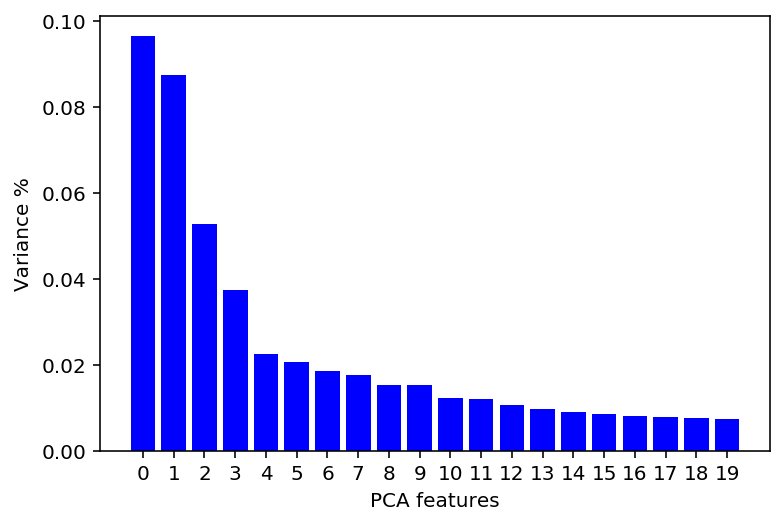

In [72]:
# Plot the explained variances
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)
#plt.savefig('explained_variance_ratioMCBaC_EndoOnly.png', dpi=400, bbox_inches = "tight")
plt.show()

In [73]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

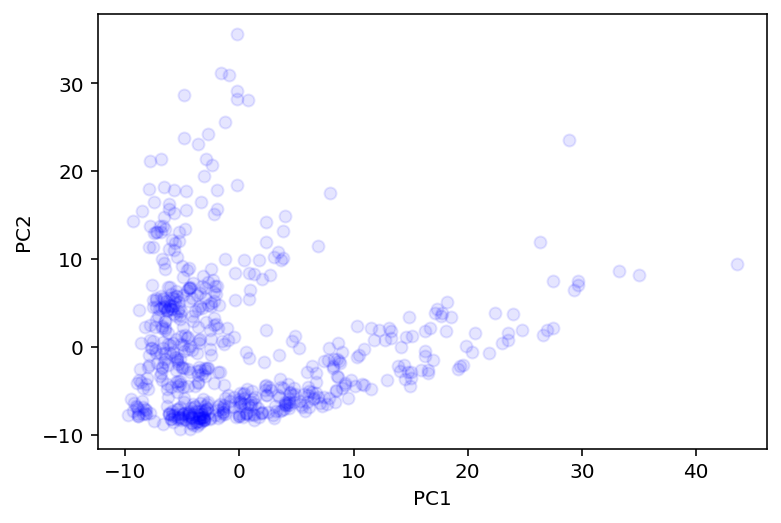

In [74]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('PCA_plot_MC_NOoBaC.png', dpi=400, bbox_inches = "tight")
plt.show()

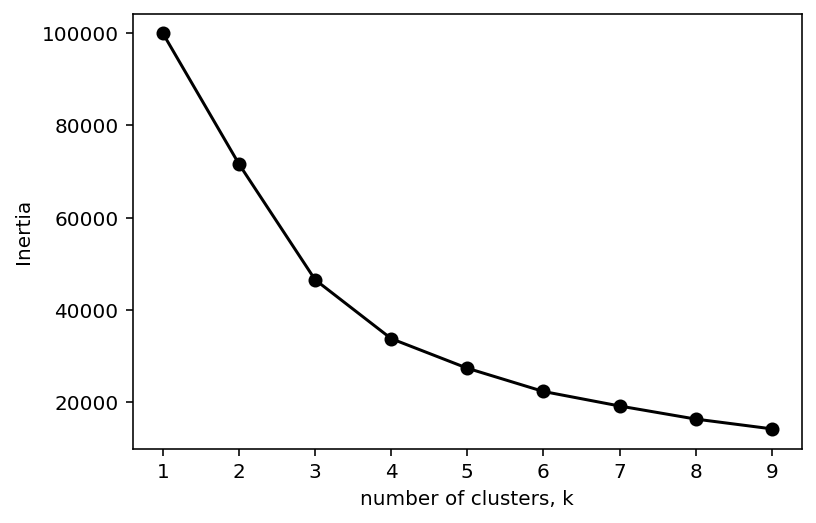

In [75]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
#plt.savefig('elbow_method_MCBaC_EndoOnly.png', dpi=400, bbox_inches = "tight")
plt.show()

In [76]:
from sklearn.cluster import KMeans

kmeans4 = KMeans(n_clusters=2)
y_kmeans4 =kmeans4.fit_predict(PCA_components)
print(y_kmeans4)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

labels = kmeans.predict(PCA_components)
centroids = kmeans.cluster_centers_

In [77]:
PCA_components.columns = ['PC'+ str(col) for col in PCA_components.columns]

In [78]:
PCA_components = PCA_components.reset_index(drop=True)
df12 = df12.reset_index(drop=True)

In [79]:
PCA_components = pd.concat([PCA_components, df12], axis=1)

In [80]:
PCA_components

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,color_MC,color_batch
0,-6.237125,6.868310,4.827208,10.843997,-4.374569,-2.196282,3.471420,1.124674,-3.415492,1.883036,...,-2.888722,-1.472359,-1.272101,0.058165,-1.354848,1.055973,-0.476379,-2.791430,orange,darkgray
1,-6.898085,5.757207,6.107735,10.572403,-2.310570,-1.773243,5.080220,0.538860,-3.033082,2.297687,...,-1.602815,-1.553195,1.516615,-0.160972,-2.754607,-0.760891,-0.725563,-1.519908,orange,darkgray
2,-4.325502,6.793113,6.364751,8.928683,-0.322507,-0.820383,9.004902,1.144307,-3.811517,3.784251,...,-4.194825,-2.305969,3.169415,-1.977621,-5.439221,-4.910633,-1.647728,1.026605,orange,darkgray
3,-5.764764,3.793825,5.305957,8.987732,-2.844646,-1.029340,3.527966,0.887431,-1.724609,1.557702,...,-3.742075,1.820364,0.159028,-0.539622,-2.853535,0.321648,1.158694,-1.166314,orange,darkgray
4,-3.693070,5.876904,4.152601,8.904443,2.261684,-3.008646,11.341786,3.441607,-4.605925,4.580970,...,-5.569011,-3.035750,5.102933,-5.878075,-6.355394,-7.683790,-6.012273,-1.382238,orange,darkgray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-3.062970,-8.350540,-0.712227,3.523052,0.782745,0.538400,-1.250524,-1.327632,0.451999,-0.345678,...,0.565808,1.248894,1.201545,-1.237724,0.090977,0.370479,0.889539,-0.041778,dodgerblue,dodgerblue
584,-3.129013,-8.018328,0.366684,2.804355,-0.334317,0.534879,-0.640422,-0.805701,-0.212243,-0.780647,...,0.303250,1.642526,1.911687,-1.008544,0.029717,-0.021037,0.358270,0.680147,dodgerblue,dodgerblue
585,-3.209629,-7.985038,0.094355,2.911980,0.229164,0.401329,-1.158483,-0.231006,0.358410,-0.542261,...,0.545116,1.237242,1.503110,-1.094912,0.316408,0.958941,0.740717,-0.595777,dodgerblue,dodgerblue
586,-3.499774,-8.767071,1.167306,2.234159,4.345049,-1.435896,1.079895,-0.548437,0.842701,-2.411032,...,0.367817,1.564257,0.656372,-2.047831,-0.295396,0.536014,0.172512,0.502014,dodgerblue,dodgerblue


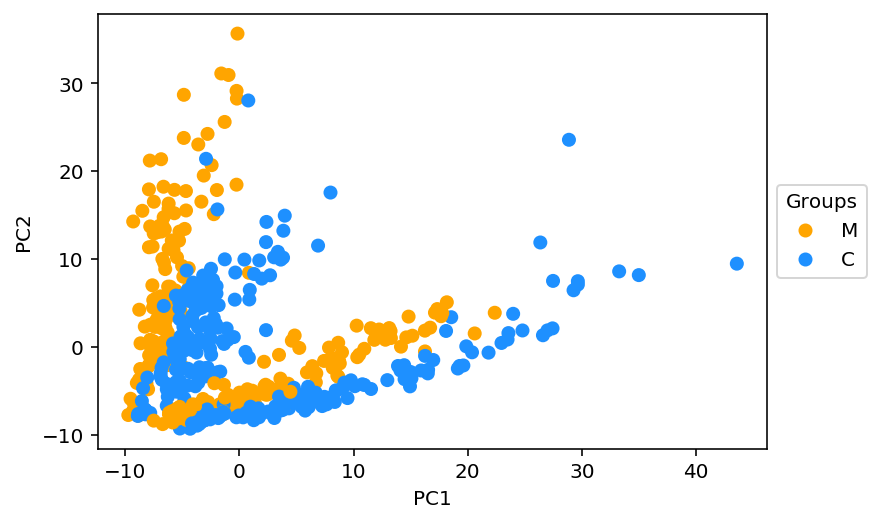

In [81]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', marker='o', lw=0),
                Line2D([0], [0], color='dodgerblue', marker='o', lw=0)]

fig, ax = plt.subplots()
scatter = plt.scatter(PCA_components['PC0'], PCA_components['PC1'], c=PCA_components['color_MC'])
legend1 = ax.legend(custom_lines, ['M', 'C'],
                title="Groups", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
scatter.figure.savefig('GroupsMC_NoBaC.png', dpi=400, bbox_inches = "tight")

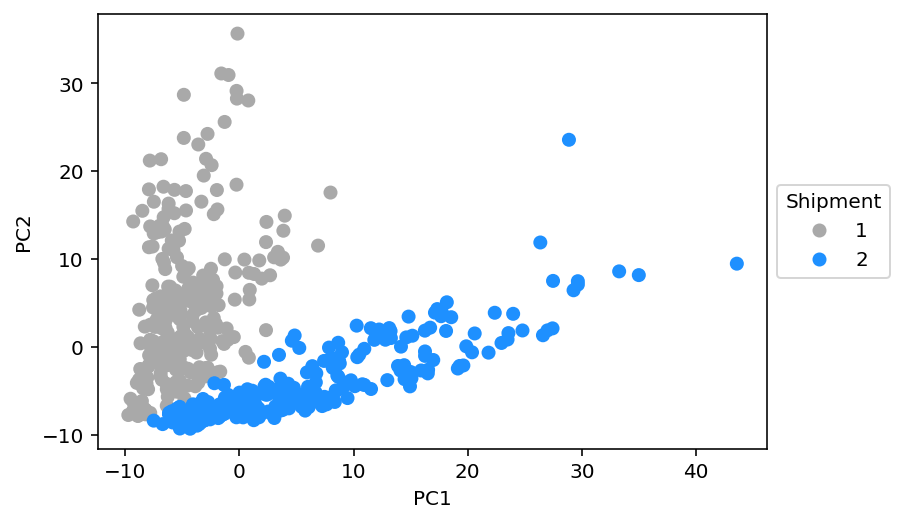

In [82]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='darkgray', marker='o', lw=0),
                Line2D([0], [0], color='dodgerblue', marker='o', lw=0)]

fig, ax = plt.subplots()
scatter = plt.scatter(PCA_components['PC0'], PCA_components['PC1'], c=PCA_components['color_batch'])
legend1 = ax.legend(custom_lines, ['1', '2'],
                title="Shipment", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
scatter.figure.savefig('ShipMC_NoBaC.png', dpi=400, bbox_inches = "tight")

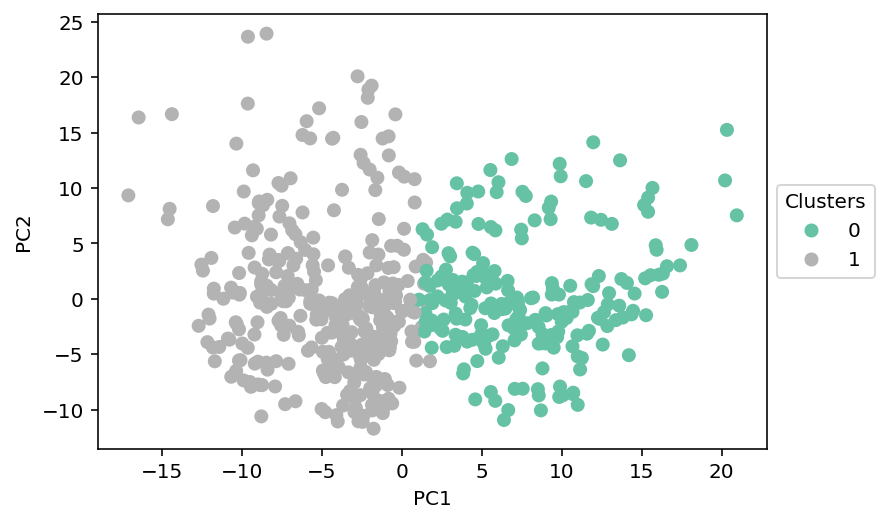

In [32]:
fig, ax = plt.subplots()
scatter = plt.scatter(PCA_components['PC0'], PCA_components['PC1'], c=y_kmeans4, cmap = 'Set2')
legend1 = ax.legend(*scatter.legend_elements(),
                title="Clusters", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
scatter.figure.savefig('ClustersMC_BaC.png', dpi=400, bbox_inches = "tight")

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.931e-01 U_stat=4.212e+04


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa66792e750>,
 [<statannot.StatResult.StatResult at 0x7fa667965c10>])

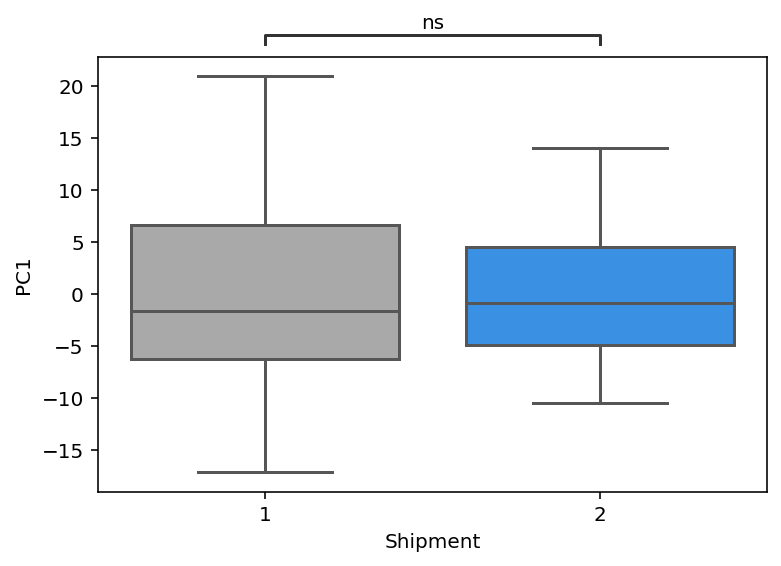

In [34]:
df = PCA_components
df['color_batch'] = df['color_batch'].str.replace('darkgray','1')
df['color_batch'] = df['color_batch'].str.replace('dodgerblue','2')

x = "color_batch"
y = "PC0"
my_pal = {"1": "darkgray", "2": "dodgerblue"}
order = ['1', '2']
ax = sns.boxplot(data=df, x=x, y=y, order=order, palette=my_pal) 
plt.xlabel('Shipment')
plt.ylabel('PC1')
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("1", "2")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
#.savefig('boxplot_BaC_B12.png', dpi=400, bbox_inches = "tight")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

M v.s. C: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.076e-77 U_stat=5.021e+03


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa667706890>,
 [<statannot.StatResult.StatResult at 0x7fa667733710>])

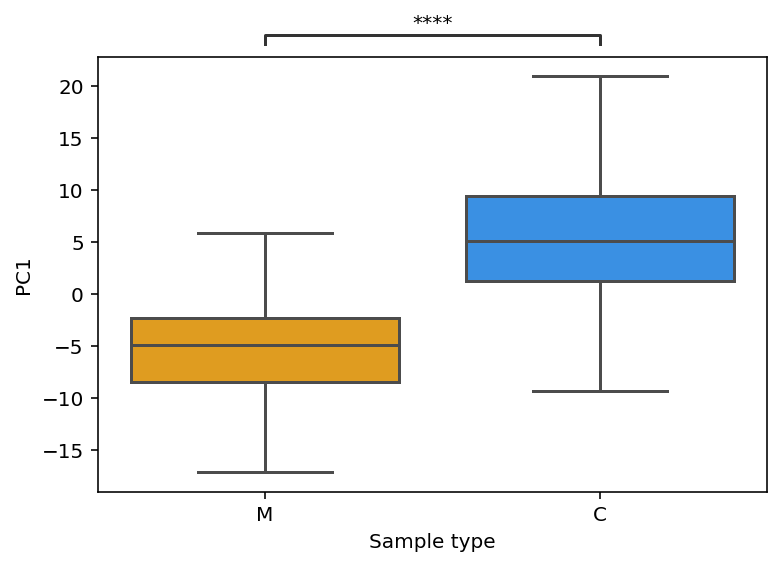

In [35]:
df = PCA_components
df['color_MC'] = df['color_MC'].str.replace('orange','M')
df['color_MC'] = df['color_MC'].str.replace('dodgerblue','C')

x = "color_MC"
y = "PC0"
my_pal = {"M": "orange", "C": "dodgerblue"}
order = ['M', 'C']
ax = sns.boxplot(data=df, x=x, y=y, order=order, palette=my_pal) 
plt.xlabel('Sample type')
plt.ylabel('PC1')
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("M", "C")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
#plt.savefig('boxplot_BaC_MC.png', dpi=400, bbox_inches = "tight")

In [36]:
df = pd.concat([PCA_components, df6], axis=1)

In [37]:
df = df[['PC0', 'PC1', 'PC2', 'batch', 'shipment', 'MC', 'PTB-FTB']]

In [38]:
df

,PC0,PC1,PC2,batch,shipment,MC,PTB-FTB
0,-1.029216,-0.613225,-2.323183,1,1,1,1.0
1,-3.130915,-3.012960,-1.794170,1,1,1,1.0
2,-2.561523,0.409711,-2.719287,1,1,1,1.0
3,-1.880614,-3.766069,-1.857517,1,1,1,1.0
4,0.010924,-1.089249,-3.127190,1,1,1,1.0
...,...,...,...,...,...,...,...
583,6.610931,-0.445044,2.978526,15,2,2,NaN
584,4.075986,1.471252,2.485488,15,2,2,NaN
585,4.724370,2.428758,1.907738,15,2,2,NaN
586,-0.946816,-4.075981,-0.021975,15,2,2,NaN


In [39]:
df = df.rename(columns={"PC2": "PC3", "PC1": "PC2", "PC0":"PC1"})

In [40]:
corr=df.corr()
corr

,PC1,PC2,PC3,batch,shipment,MC,PTB-FTB
PC1,1.000000e+00,5.228456e-17,-4.076421e-17,-0.195476,-0.003009,7.368901e-01,-1.147919e-02
PC2,5.228456e-17,1.000000e+00,-1.439501e-15,-0.211434,-0.053255,-1.542617e-01,-6.952821e-02
PC3,-4.076421e-17,-1.439501e-15,1.000000e+00,0.083291,-0.065042,4.616399e-02,5.011144e-02
batch,-1.954765e-01,-2.114344e-01,8.329095e-02,1.000000,-0.014660,3.535400e-03,4.066836e-02
shipment,-3.009365e-03,-5.325549e-02,-6.504200e-02,-0.014660,1.000000,0.000000e+00,-7.732393e-02
MC,7.368901e-01,-1.542617e-01,4.616399e-02,0.003535,0.000000,1.000000e+00,-2.364811e-17
PTB-FTB,-1.147919e-02,-6.952821e-02,5.011144e-02,0.040668,-0.077324,-2.364811e-17,1.000000e+00


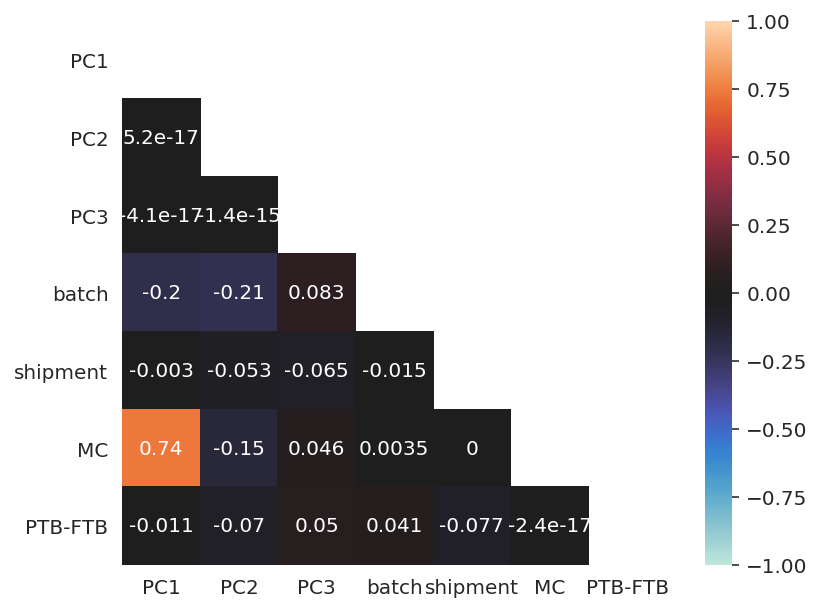

In [41]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, square=True, center=0, annot=True)
plt.savefig('matrix_parametersBaC_pearssonR.png', dpi=400, bbox_inches = "tight")

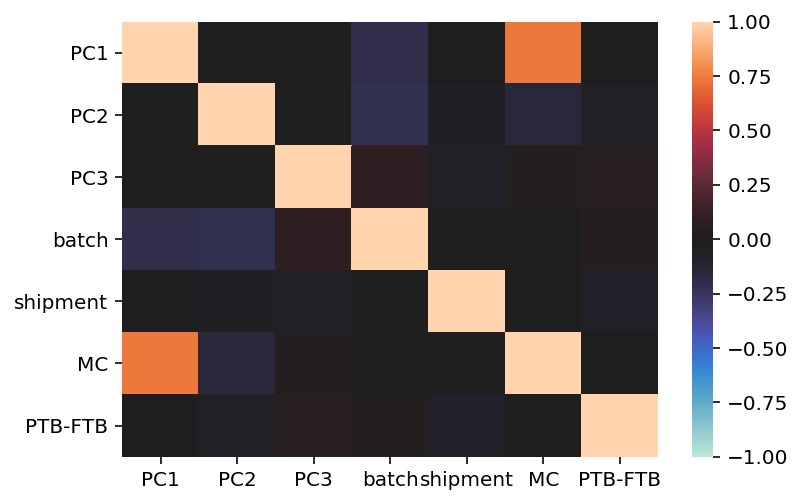

In [42]:
ax = sns.heatmap(corr, vmax=1, vmin=-1,center=0)

In [43]:
df['PTB-FTB'] = df['PTB-FTB'].fillna(1)
df = df.astype(float)
df['PTB-FTB'].value_counts()

1.0    548
2.0     40
Name: PTB-FTB, dtype: int64

In [44]:
# Create a correlation matrix with p-values 
from scipy.stats import pearsonr

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 20)
    return pvalues

df_pm = calculate_pvalues(df)
df_pm = df_pm.astype(float)
df_pm

,PC1,PC2,PC3,batch,shipment,MC,PTB-FTB
PC1,0.000000,1.000000e+00,1.000000,1.787128e-06,0.941951,0.000000,0.491030
PC2,1.000000,0.000000e+00,1.000000,2.282589e-07,0.197209,0.000173,0.286951
PC3,1.000000,1.000000e+00,0.000000,4.349662e-02,0.115142,0.263725,0.407412
batch,0.000002,2.282589e-07,0.043497,0.000000e+00,0.722771,0.931827,0.432155
shipment,0.941951,1.972089e-01,0.115142,7.227714e-01,0.000000,1.000000,0.001201
MC,0.000000,1.732110e-04,0.263725,9.318267e-01,1.000000,0.000000,1.000000
PTB-FTB,0.491030,2.869508e-01,0.407412,4.321552e-01,0.001201,1.000000,0.000000


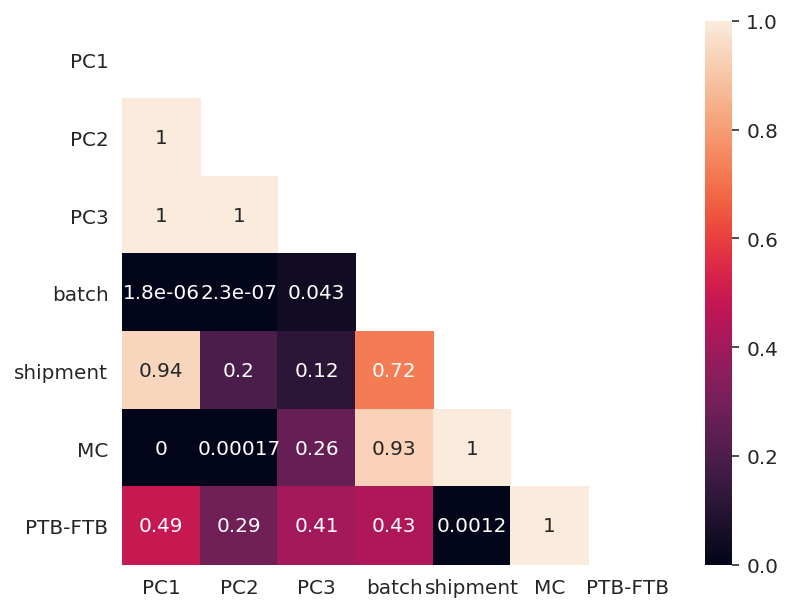

In [45]:
mask = np.zeros_like(df_pm)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(df_pm, mask=mask, vmax=1, vmin=0.00, square=True, annot=True)
plt.savefig('matrix_parametersBaC_p-values.png', dpi=400, bbox_inches = "tight")

In [46]:
PCA_components

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,color_MC,color_batch
0,-1.029216,-0.613225,-2.323183,1.190772,-1.062774,-1.017678,-1.237107,-2.445597,2.921264,0.543638,...,0.591929,0.428055,-1.581642,1.521621,1.378543,-0.637133,-2.004544,-1.038741,M,1
1,-3.130915,-3.012960,-1.794170,-0.539951,0.957726,-0.422601,-0.259035,-0.793224,1.600761,0.381992,...,1.622452,1.224768,-0.325636,1.863595,0.529217,-1.225892,-0.948233,-0.324399,M,1
2,-2.561523,0.409711,-2.719287,0.626535,4.062134,0.869647,-1.623044,2.076120,-2.342050,1.765954,...,0.679204,0.455917,-4.133030,-0.100045,0.053578,1.602609,-1.943089,1.913488,M,1
3,-1.880614,-3.766069,-1.857517,1.635386,0.241148,-1.299700,-1.010040,-2.678248,-1.069118,-0.509172,...,0.062868,-0.500114,-1.735151,-0.798395,0.828546,2.359202,-2.244126,1.251891,M,1
4,0.010924,-1.089249,-3.127190,1.560881,7.231255,0.483544,-2.259558,0.396469,-1.152310,-0.194403,...,0.303090,2.007896,-3.638455,0.879581,1.302422,1.819316,-3.836237,6.874806,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,6.610931,-0.445044,2.978526,-3.196035,-1.618670,-1.772484,1.452289,1.283843,1.621163,0.599723,...,-1.083931,0.493835,0.643897,-1.949480,0.016518,-1.236983,1.107933,0.647116,C,2
584,4.075986,1.471252,2.485488,-1.146697,-4.268613,0.699672,1.307557,-1.891289,-1.790765,0.440903,...,1.862030,1.095560,0.633359,-1.870158,3.579854,1.422346,2.354605,-3.654542,C,2
585,4.724370,2.428758,1.907738,-0.486980,-3.160015,-0.628851,0.844064,-1.231893,0.998494,-1.168428,...,0.219352,3.442092,-1.664087,0.864365,0.535401,2.712875,1.582657,1.182083,C,2
586,-0.946816,-4.075981,-0.021975,1.556612,8.158406,1.712362,-0.542681,-3.268398,-1.410107,-3.519108,...,-0.307191,3.083449,2.455100,-1.459919,-1.874511,-1.186894,-1.429954,2.259069,C,2


In [47]:
df = pd.melt(PCA_components, id_vars=['color_batch', 'color_MC'], value_vars=['PC0', 'PC1', 'PC2', 'PC3', 'PC4'])

In [48]:
df.columns = df.columns.str.replace('variable', 'PC')
df

,color_batch,color_MC,PC,value
0,1,M,PC0,-1.029216
1,1,M,PC0,-3.130915
2,1,M,PC0,-2.561523
3,1,M,PC0,-1.880614
4,1,M,PC0,0.010924
...,...,...,...,...
2935,2,C,PC4,-1.618670
2936,2,C,PC4,-4.268613
2937,2,C,PC4,-3.160015
2938,2,C,PC4,8.158406


Text(0, 0.5, 'PC')

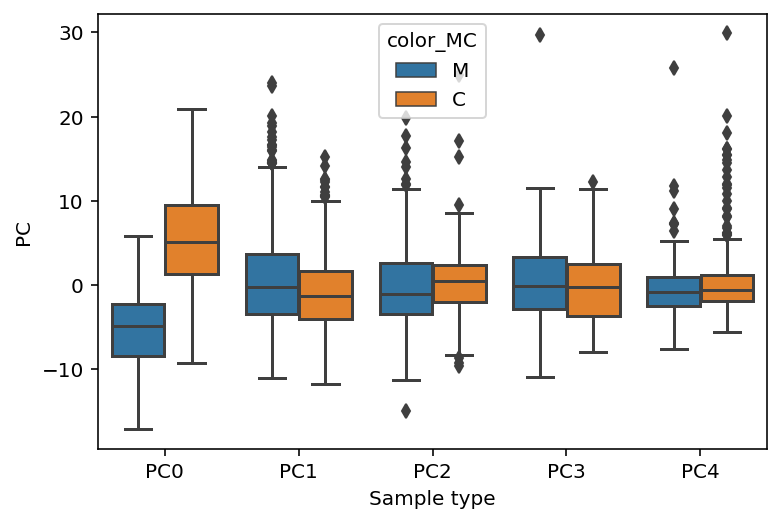

In [49]:
df.columns = df.columns.str.replace('variable', 'PC')

my_pal = {"M": "orange", "C": "dodgerblue"}

ax = sns.boxplot(data=df, x='PC', y='value', hue='color_MC') 
plt.xlabel('Sample type')
plt.ylabel('PC')

In [ ]:
add_stat_annotation(ax, data=df, x=df['PC'], y=df['value'], hue = df['color_MC'], order=order,
                    box_pairs=[("PC0", "PC1")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
#plt.savefig('boxplot_BaC_MC.png', dpi=400, bbox_inches = "tight")